# Optimizing Kaggle kernels using Intel(R) Extension for Scikit-learn*

For classical machine learning algorithms, we often use the most popular Python library, [scikit-learn](https://scikit-learn.org/stable/). We use it to fit models and search for optimal parameters, but scikit-learn sometimes works for hours, if not days. Speeding up this process is something anyone who uses scikit-learn would be interested in.

I want to show you how to get results faster without changing the code. To do this, we will use another Python library, **[scikit-learn-intelex](https://github.com/intel/scikit-learn-intelex)**. It accelerates scikit-learn and does not require you changing the code written for scikit-learn.

I will use a Kaggle notebook in which the train and predict of the SVM model executed in over 7 minutes.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

x_train = train[train.columns[1:]]
x_test = test
y_train = train[train.columns[0]]

train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x_train, y_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

Let's take the training and predict into a separate function:

In [4]:
def train_predict():
    from sklearn.svm import SVC
    clf = SVC(C=9, kernel="rbf", probability=True)
    clf.fit(x_train, y_train)
    return clf.predict_proba(x_test)

In [5]:
%%time
y_pred_original = train_predict()

CPU times: user 24min 4s, sys: 590 ms, total: 24min 4s
Wall time: 24min 11s


In [6]:
y_pred_original

array([[8.68212312e-10, 1.89892513e-10, 9.99975778e-01, ...,
        5.81773772e-06, 1.48951152e-06, 8.20102662e-06],
       [9.99871479e-01, 3.24074563e-05, 3.49360531e-05, ...,
        5.19661278e-06, 2.57483574e-06, 1.91215262e-05],
       [6.23770048e-05, 5.25438658e-04, 6.21531043e-04, ...,
        1.43428289e-03, 2.67552947e-03, 9.88656235e-01],
       ...,
       [2.73529518e-12, 3.29003903e-12, 6.59424352e-12, ...,
        3.99053576e-08, 7.67937459e-07, 1.46370934e-06],
       [9.58285682e-05, 2.17489225e-06, 9.55621239e-06, ...,
        2.12063270e-04, 1.75644614e-05, 9.95697116e-01],
       [3.09939422e-09, 1.51436978e-09, 9.99884886e-01, ...,
        6.01502084e-06, 2.88488240e-05, 1.63222430e-05]])

In [7]:
np.argmax(y_pred_original, axis=1)

array([2, 0, 9, ..., 3, 9, 2])

In [8]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub.Label = np.argmax(y_pred_original, axis=1)
sub.to_csv('submission_original.csv',index=False)

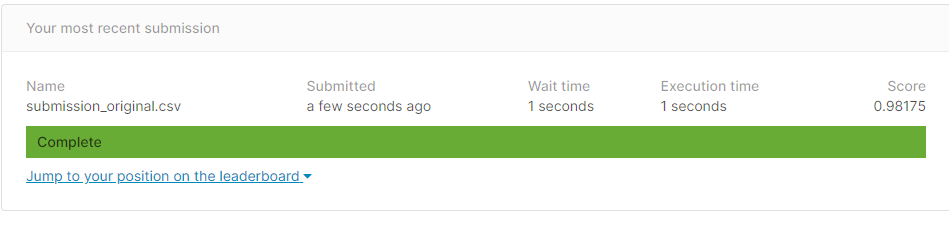

The train and predict of the SVM model took almost 7 minutes. Let's try to use scikit-learn-intelex. First, download it:

In [9]:
!pip install scikit-learn-intelex --progress-bar off >> /tmp/pip_sklearnex.log

To get optimizations, patch scikit-learn using scikit-learn-intelex:

In [10]:
from sklearnex import patch_sklearn, config_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [11]:
from sklearn.svm import SVC

Let’s run the same code to train and predict the SVM model:

In [12]:
%%time

y_pred_oprimized = train_predict()

CPU times: user 5min 43s, sys: 20.7 s, total: 6min 4s
Wall time: 7min 1s


This time, the train and predict took **a little over minute**, which saved us almost **7 minutes**! Let’s make sure that the quality has not changed:

In [13]:
#np.mean(y_pred_oprimized == y_pred_original)

In [14]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub.Label = np.argmax(y_pred_oprimized, axis=1)
sub.to_csv('submission_sklearnex.csv',index=False)

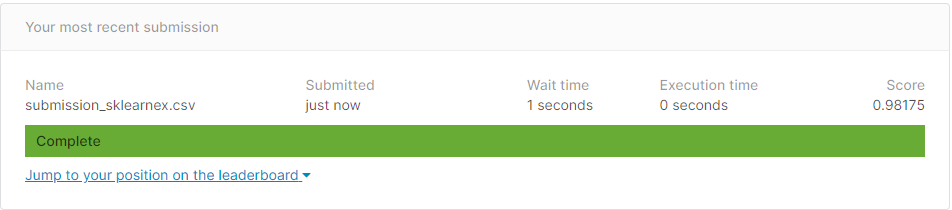
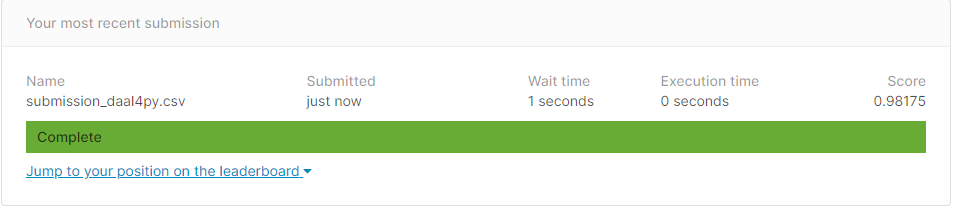

With scikit-learn-intelex patching you can:

- Use your scikit-learn code for training and inference without modification.
- Train and predict scikit-learn models up to **7 times faster**.
- Get the same quality of predictions as other tested frameworks.

*Please, upvote if you like.*